In [532]:
import pandas as pd 
import numpy as np 
import datetime 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import scipy.stats as stats

In [533]:
#Q1. Import claims_data.csv and cust_data.csv which is provided to you and combine the two datasets appropriate to create a 360 degree view of the data.
# Use the same for the subsequent questions.

In [534]:
claims = pd.read_csv("C:/Users/Pawan Sharma/Desktop/AnalytixLabs/Case Studies/Python/Python Foundation Case Study 3 - Insurance Claims Case Study/claims.csv")
claims.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No


In [535]:
cust_demo = pd.read_csv("C:/Users/Pawan Sharma/Desktop/AnalytixLabs/Case Studies/Python/Python Foundation Case Study 3 - Insurance Claims Case Study/cust_demographics.csv")
cust_demo.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,47830476,Female,01-May-86,MA,413-187-7945,Silver
4,19269962,Male,13-May-77,NV,956-871-8691,Gold


In [536]:
Cust_Claim = pd.merge(left=cust_demo,right=claims,left_on="CUST_ID",right_on="customer_id",how = "inner")
Cust_Claim.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,63017412,30308357,Driver error,04/04/2018,Auto,No,Material only,$1950,6.0,No
4,47830476,Female,01-May-86,MA,413-187-7945,Silver,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No


In [537]:
#Q2. Perform a data audit for the datatypes and find out if there are any mismatch
#within the current datatypes of the columns and their business significance.

In [538]:
Cust_Claim.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1085 entries, 0 to 1084
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CUST_ID              1085 non-null   int64  
 1   gender               1085 non-null   object 
 2   DateOfBirth          1085 non-null   object 
 3   State                1085 non-null   object 
 4   Contact              1085 non-null   object 
 5   Segment              1085 non-null   object 
 6   claim_id             1085 non-null   int64  
 7   customer_id          1085 non-null   int64  
 8   incident_cause       1085 non-null   object 
 9   claim_date           1085 non-null   object 
 10  claim_area           1085 non-null   object 
 11  police_report        1085 non-null   object 
 12  claim_type           1085 non-null   object 
 13  claim_amount         1020 non-null   object 
 14  total_policy_claims  1075 non-null   float64
 15  fraudulent           1085 non-null   o

In [539]:
from pandas import DataFrame
#Data Audit
d=Cust_Claim.dtypes[Cust_Claim.dtypes!='object'].index.values
Cust_Claim[d]=Cust_Claim[d].astype('float64')

mean=DataFrame({'mean':Cust_Claim[d].mean()})
std_dev=DataFrame({'std_dev':Cust_Claim[d].std()})
missing= DataFrame({'missing':Cust_Claim[d].isnull().sum()})
minimum=DataFrame({'min':Cust_Claim[d].min()})
maximum=DataFrame({'max':Cust_Claim[d].max()})
data_audit1=pd.concat([mean,std_dev,missing,minimum,maximum],axis=1,sort = False)

c=Cust_Claim.dtypes[Cust_Claim.dtypes=='object'].index.values
Mean=DataFrame({'mean':np.repeat('Not Applicable',len(c))},index=c)
Std_Dev=DataFrame({'std_dev':np.repeat('Not Applicable',len(c))},index=c)
Missing=DataFrame({'missing':Cust_Claim[c].isnull().sum()})
Minimum=DataFrame({'min':np.repeat('Not Applicable',len(c))},index=c)
Maximum=DataFrame({'max':np.repeat('Not Applicable',len(c))},index=c)
data_audit2=pd.concat([Mean,Std_Dev,Missing,Minimum,Maximum],axis =1,sort = False)

concat_audit = pd.concat([data_audit1,data_audit2])
concat_audit.to_csv('DataAudit.csv')
concat_audit2 = pd.read_csv("DataAudit.csv")
concat_audit2.rename(columns = {'Unnamed: 0':''})

,,mean,std_dev,missing,min,max
0,CUST_ID,50767904.341935486,28496245.372373052,0,154557.0,99961993.0
1,claim_id,48915528.40092166,29128181.617819,0,26832.0,99775483.0
2,customer_id,50767904.341935486,28496245.372373052,0,154557.0,99961993.0
3,total_policy_claims,1.5869767441860465,1.1468593964606506,10,1.0,8.0
4,gender,Not Applicable,Not Applicable,0,Not Applicable,Not Applicable
5,DateOfBirth,Not Applicable,Not Applicable,0,Not Applicable,Not Applicable
6,State,Not Applicable,Not Applicable,0,Not Applicable,Not Applicable
7,Contact,Not Applicable,Not Applicable,0,Not Applicable,Not Applicable
8,Segment,Not Applicable,Not Applicable,0,Not Applicable,Not Applicable
9,incident_cause,Not Applicable,Not Applicable,0,Not Applicable,Not Applicable


In [540]:
Cust_Claim["DateOfBirth"] = pd.to_datetime(Cust_Claim["DateOfBirth"])
Cust_Claim["claim_date"] = pd.to_datetime(Cust_Claim["claim_date"])


In [541]:
#Q3. Convert the column claim amount into numeric. Use the appropriate modules/ attributes to remove the dollar sign ($).

In [542]:
Cust_Claim["claim_amount"] = Cust_Claim.claim_amount.str.replace("$","").astype("float")

<ipython-input-542-d008c42f4883>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  Cust_Claim["claim_amount"] = Cust_Claim.claim_amount.str.replace("$","").astype("float")


In [543]:
Cust_Claim.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1085 entries, 0 to 1084
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CUST_ID              1085 non-null   float64       
 1   gender               1085 non-null   object        
 2   DateOfBirth          1085 non-null   datetime64[ns]
 3   State                1085 non-null   object        
 4   Contact              1085 non-null   object        
 5   Segment              1085 non-null   object        
 6   claim_id             1085 non-null   float64       
 7   customer_id          1085 non-null   float64       
 8   incident_cause       1085 non-null   object        
 9   claim_date           1085 non-null   datetime64[ns]
 10  claim_area           1085 non-null   object        
 11  police_report        1085 non-null   object        
 12  claim_type           1085 non-null   object        
 13  claim_amount         1020 non-nul

In [544]:
#Q4.Of all the injury claims, some of them have gone unreported with the police. 
#Create an alert flag(1,0) for all such claims.

In [545]:
Cust_Claim['Flag'] = np.where(Cust_Claim.police_report == 'Unknown',0,1)
Cust_Claim.head(2)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,Flag
0,21868593.0,Female,1979-01-12,VT,789-916-8172,Platinum,54004764.0,21868593.0,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,1
1,75740424.0,Female,2070-01-13,ME,265-543-1264,Silver,33985796.0,75740424.0,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,0


In [546]:
#Q5. One customer can claim for insurance more than once and in each claim, 
# multiple categories of claims can be involved. However, customer ID should remain unique.
# Retain the most recent observation and delete any duplicated records in the data based on the customer ID column.

In [547]:
data_new = Cust_Claim.drop_duplicates(subset = 'CUST_ID',keep = 'last')
data_new.head(2)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,Flag
0,21868593.0,Female,1979-01-12,VT,789-916-8172,Platinum,54004764.0,21868593.0,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,1
1,75740424.0,Female,2070-01-13,ME,265-543-1264,Silver,33985796.0,75740424.0,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,0


In [548]:
#Q6. Check for missing values and impute the missing values with an appropriate value. (mean for continuous and mode for categorical)

In [549]:
Cust_Claim.isnull().sum()

CUST_ID                 0
gender                  0
DateOfBirth             0
State                   0
Contact                 0
Segment                 0
claim_id                0
customer_id             0
incident_cause          0
claim_date              0
claim_area              0
police_report           0
claim_type              0
claim_amount           65
total_policy_claims    10
fraudulent              0
Flag                    0
dtype: int64

In [550]:
#For categorical variable
Cust_Claim["total_policy_claims"] = Cust_Claim["total_policy_claims"].fillna(Cust_Claim["total_policy_claims"].mode())

#For continuous variable
Cust_Claim["claim_amount"] = Cust_Claim["claim_amount"].fillna(Cust_Claim["claim_amount"].mean())
Cust_Claim.isnull().sum()

CUST_ID                 0
gender                  0
DateOfBirth             0
State                   0
Contact                 0
Segment                 0
claim_id                0
customer_id             0
incident_cause          0
claim_date              0
claim_area              0
police_report           0
claim_type              0
claim_amount            0
total_policy_claims    10
fraudulent              0
Flag                    0
dtype: int64

In [551]:
#Q7. Calculate the age of customers in years. Based on the age, categorize the
#customers according to the below criteria
#Children < 18
#Youth 18-30
#Adult 30-60
#Senior > 60

In [552]:
year_current = datetime.datetime.now().year
year_dob = Cust_Claim.DateOfBirth.dt.year          

year_1 = year_dob-100                                               
year_2 = year_current - year_1

year_final = year_current - year_dob

Cust_Claim['Age'] = np.where(year_dob > year_current,year_2,year_final)
Cust_Claim.head(2)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,Flag,Age
0,21868593.0,Female,1979-01-12,VT,789-916-8172,Platinum,54004764.0,21868593.0,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,1,42
1,75740424.0,Female,2070-01-13,ME,265-543-1264,Silver,33985796.0,75740424.0,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,0,51


In [553]:
Cust_Claim["Age_cat"] = np.where(Cust_Claim.Age < 18, "Children", np.where((Cust_Claim.Age > 18) & (Cust_Claim.Age < 30), "Youth",
                                                                           np.where(((Cust_Claim.Age > 30) &  (Cust_Claim.Age < 60)), "Adult", "Senior")))
Cust_Claim.head(2)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,Flag,Age,Age_cat
0,21868593.0,Female,1979-01-12,VT,789-916-8172,Platinum,54004764.0,21868593.0,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,1,42,Adult
1,75740424.0,Female,2070-01-13,ME,265-543-1264,Silver,33985796.0,75740424.0,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,0,51,Adult


In [554]:
#Q8. nWhat is the average amount claimed by the customers from various segments?

In [555]:
df = Cust_Claim.loc[:, ["Segment", "claim_amount"]].groupby("Segment").claim_amount.mean().reset_index()
df

,Segment,claim_amount
0,Gold,12829.631974
1,Platinum,12341.952267
2,Silver,12208.435570


In [556]:
df = df.rename(columns = {"claim_amount":"Mean_Amount"})  
df

,Segment,Mean_Amount
0,Gold,12829.631974
1,Platinum,12341.952267
2,Silver,12208.435570


In [557]:
#Q9.what is the total claim amount based on incident cause for all the claims that have been done at least 20 days prior to 1st of october,2018.

In [558]:
c = pd.Timestamp(day = 1, month = 10, year = 2018)
b = c + pd.DateOffset(days = -20)

Cust_Claim.loc[(Cust_Claim["claim_date"] <= c) & (Cust_Claim["claim_date"] >=b), ["claim_amount"]].claim_amount.sum()

324678.8627450981

In [559]:
#Q10. How many adults from TX, DE and AK claimed insurence for driver related issues and causes?

In [560]:
df = Cust_Claim.loc[(Cust_Claim.State.isin(["TX", "DE", "AK"])) & (Cust_Claim.Age_cat=="Adult") & 
                    (Cust_Claim.incident_cause.isin(["Driver error", "Other driver error"])), 
                    ["Age_cat","State","incident_cause"]]
df
df.groupby("State").Age_cat.count()

State
AK     9
DE    10
TX     9
Name: Age_cat, dtype: int64

In [561]:
#Q.11 Draw a pie chart between the aggregated value of claim amount based on gender and segment. 
#Present the claim amount as a percentage on the pie chart.

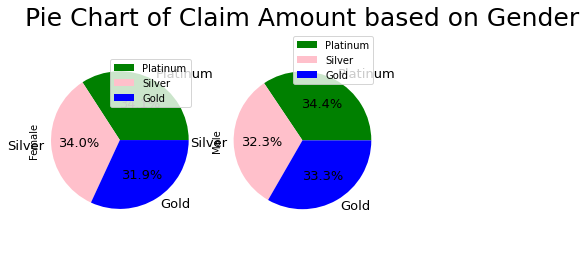

In [562]:
pivot_table = pd.pivot_table(Cust_Claim, index =['Segment'],columns ='gender',values ='claim_amount')


pivot_table.plot(kind='pie', 
            labels=['Platinum','Silver','Gold'],
            colors=['green', 'pink', 'blue'],
            autopct='%.1f%%',
            fontsize=13,
            subplots='true', )


plt.title('Pie Chart of Claim Amount based on Gender',fontsize=25)
plt.axis('equal')
plt.show()

In [563]:
#Q12.Among male and female which gender had claimed the most for any type of driver realted issues? 
#E.g. This matric can be compared using a bar char.

In [564]:
Cust_Claim.head(2)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,Flag,Age,Age_cat
0,21868593.0,Female,1979-01-12,VT,789-916-8172,Platinum,54004764.0,21868593.0,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,1,42,Adult
1,75740424.0,Female,2070-01-13,ME,265-543-1264,Silver,33985796.0,75740424.0,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,0,51,Adult


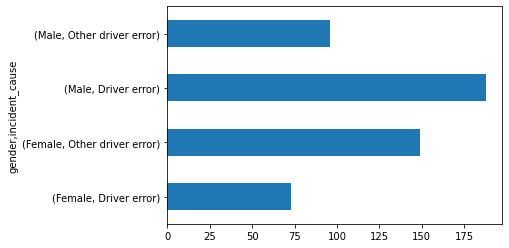

In [565]:
df = Cust_Claim.loc[Cust_Claim.incident_cause.isin(["Driver error", "Other driver error"]),["gender","incident_cause"]]
df
df.groupby(["gender", "incident_cause"]).incident_cause.count().plot(kind = "barh")
plt.show()

In [566]:
#Q13. Which age group had the maximum fraudulent policy claims? Visualize it on bar graph.

In [567]:
Cust_Claim.head(2)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,Flag,Age,Age_cat
0,21868593.0,Female,1979-01-12,VT,789-916-8172,Platinum,54004764.0,21868593.0,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,1,42,Adult
1,75740424.0,Female,2070-01-13,ME,265-543-1264,Silver,33985796.0,75740424.0,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,0,51,Adult


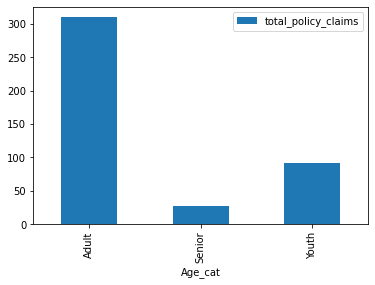

In [568]:
df = Cust_Claim.loc[Cust_Claim.fraudulent=="Yes", ["Age_cat", "fraudulent", "total_policy_claims"]].groupby("Age_cat").total_policy_claims.sum().reset_index()
df.plot.bar(x = "Age_cat")
plt.show()

In [569]:
#Q14.Visualize the monthly trend of the total amount that has been claimed by the customers.
#Ensure that on the "month" axis, the month is in a chronological order not alphabetical order.

In [570]:
#Create new column "claim_date_month" for month
Cust_Claim["claim_date_month"] = Cust_Claim["claim_date"].dt.month
Cust_Claim.head(2)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,Flag,Age,Age_cat,claim_date_month
0,21868593.0,Female,1979-01-12,VT,789-916-8172,Platinum,54004764.0,21868593.0,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,1,42,Adult,11
1,75740424.0,Female,2070-01-13,ME,265-543-1264,Silver,33985796.0,75740424.0,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,0,51,Adult,10


In [571]:
data = Cust_Claim.loc[:, ["claim_date_month", "claim_amount"]].groupby("claim_date_month").claim_amount.sum().reset_index()
data.head()

,claim_date_month,claim_amount
0,1,1.331992e+06
1,2,1.169906e+06
2,3,1.320080e+06
3,4,1.293886e+06
4,5,1.114189e+06


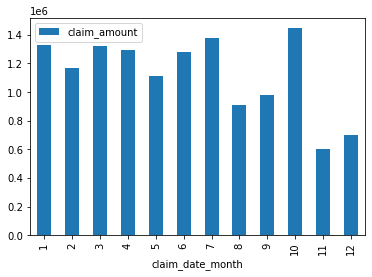

In [572]:
data.plot.bar(x="claim_date_month", y="claim_amount")
plt.show()

In [573]:
#Q15. What is the average claim amount for gender and age categories and suitable represent the above using a facetted bar chat,
#one facet that represents fraudulent claims and the other for non-fradulent claims.

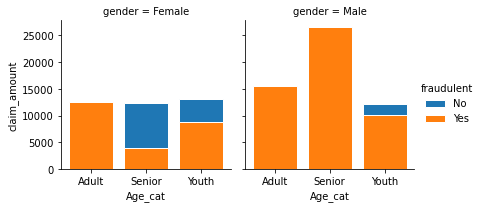

In [574]:
data = Cust_Claim.loc[:, ["gender", "fraudulent", "claim_amount", "Age_cat"]].groupby(["fraudulent", "gender", "Age_cat"]).claim_amount.mean().reset_index()
data
graph = sns.FacetGrid(data, col = "gender", hue = "fraudulent")

graph.map(plt.bar, "Age_cat", "claim_amount", edgecolor ="w").add_legend()

plt.show()

In [575]:
#Based on the conclusions from exploratory analysis as well as suitable statistical tests, answer the below questions.
#Please include a detailed write-up on the parameters taken into consideration, 
#the hypothesis testing steps, conclusion from the P-values and the business implications of the statement

In [576]:
#Q16. Is there any similarity in the amount claimed by males and females?
sample_female = Cust_Claim.loc[Cust_Claim.gender=="Female", ["gender", "claim_amount"]]
sample_female.shape[0]

529

In [577]:
sample_male = Cust_Claim.loc[Cust_Claim.gender=="Male", ["gender", "claim_amount"]]
sample_male.shape[0]

556

In [578]:
#Formulation of Hypothesis:
#Null Hypothesis: H0:u1 = u2
#Alternative Hypothesis: Ha: Ha:u1 <> u2  (Two-Tailed)

#Apply independent or unpaired 't'-test for testing the claim under the hypothesis.
stats.ttest_ind(sample_female["claim_amount"], sample_male["claim_amount"])

Ttest_indResult(statistic=-0.9738138415066818, pvalue=0.33036643165116597)

In [579]:
# 't'-test statistic = -0.97381  (approx.)
# P-value = 0.3304 (approx.)
# Level of significance = 0.05

## Conclusion: ##
# The P-value is greater as compared to the 5% level of significance. We fail to reject the null hypothesis. 
# We can conlude that there is no differnce between the mean anount of claim_amount for male and female. 
# Therefore, there is similarity in the amount claimed by males and females.

In [580]:
#Q17. Is there any relations b/w age category and segment?

In [581]:
Age_cat_seg = pd.crosstab(index = Cust_Claim["Age_cat"], columns = Cust_Claim["Segment"], margins = True)
Age_cat_seg

Segment,Gold,Platinum,Silver,All
Age_cat,,,,
Adult,279,257,246,782
Senior,22,26,24,72
Youth,74,79,78,231
All,375,362,348,1085


In [582]:
# Formulation of Hypothesis:
# Null Hypothesis:There is no relationship between age category and Segment
# Alternative Hypothesis: There is a relationship between age category and Segment

#Applyig Chi-square test of independence
stats.chi2_contingency( Age_cat_seg )

(1.647034896525732,
 0.9959019216608677,
 9,
 array([[ 270.2764977 ,  260.90691244,  250.81658986,  782.        ],
        [  24.88479263,   24.02211982,   23.09308756,   72.        ],
        [  79.83870968,   77.07096774,   74.09032258,  231.        ],
        [ 375.        ,  362.        ,  348.        , 1085.        ]]))

In [583]:
# Chi-square statistic = 1.647 (approx.)
# P-value = 0.9959 (approx.)
# Degree of freedom = 9
# Level of significance = 0.05

## Conclusion: ##
# The P-value is greater than the 5% level of significance. We fail to reject the null hypothesis. 
# We have no enough evidence that the age category and Segment variables are associated or dependent of each other.

In [584]:
#Q18. The current year has shown a significant rise in claim amount as compared to 2016-2017 fiscal average which was $10,0000.

In [585]:
#Adding new column "year_claim_date"
Cust_Claim["Year_claim_date"] = Cust_Claim["claim_date"].dt.year

sample = Cust_Claim.loc[Cust_Claim["Year_claim_date"]==2017, ["claim_amount", "Year_claim_date"]]
sample.head(2)

,claim_amount,Year_claim_date
0,2980.0,2017
5,1440.0,2017


In [586]:
# Formulation of Hypothesis:
# Null Hypothesis:H0:u <= $10,000
# Alternative Hypothesis: Ha:u > $10,000

# One sample 't'-test
stats.ttest_1samp(sample.claim_amount, popmean=10000, alternative = "greater")

Ttest_1sampResult(statistic=4.195278754700451, pvalue=1.5697593691366917e-05)

In [587]:
# 't'-test statistic = 4.195 (approx.)
# P-value = 0.000 (approx.)
# Level of significance = 0.05

## Conclusion: ##
# The P-value is less than the 5% level of significance. We reject the null hypothesis. 
# We have enough evidence that there is significant rise in claim amount as compared to 2016-2017 fiscal average which was $10,0000.

In [588]:
#Q19. Is there any difference b/w age groups and insurance claims ?

In [589]:
table = pd.crosstab(index = Cust_Claim["Age_cat"], columns = Cust_Claim["total_policy_claims"])
table

total_policy_claims,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0
Age_cat,,,,,,,,
Adult,567,79,65,42,15,6,1,0
Senior,52,7,4,4,3,1,0,0
Youth,166,19,17,13,9,3,1,1


In [590]:
# Formulation of Hypothesis:
# Null Hypothesis:There is no relationship between age category and total_policy_claims
# Alternative Hypothesis: There is a relationship between age category and total_policy_claims

#Applyig Chi-square test of independence
stats.chi2_contingency( table )

(10.581144446973257,
 0.718581564809819,
 14,
 array([[5.65930233e+02, 7.56976744e+01, 6.20000000e+01, 4.25348837e+01,
         1.94651163e+01, 7.20930233e+00, 1.44186047e+00, 7.20930233e-01],
        [5.18465116e+01, 6.93488372e+00, 5.68000000e+00, 3.89674419e+00,
         1.78325581e+00, 6.60465116e-01, 1.32093023e-01, 6.60465116e-02],
        [1.67223256e+02, 2.23674419e+01, 1.83200000e+01, 1.25683721e+01,
         5.75162791e+00, 2.13023256e+00, 4.26046512e-01, 2.13023256e-01]]))

In [591]:
# Chi-square statistic = 10.58 (approx.)
# P-value = 0.7186 (approx.)
# Degree of freedom = 14
# Level of significance = 0.05

## Conclusion: ##
# The P-value is greater than the 5% level of significance. We fail to reject the null hypothesis. 
# We have no enough evidence that the age category and total_policy_claims variables are associated or dependent of each other.

In [592]:
#Q20. Is there any relationship b/w total no. of policy claims and the claimed amount?

In [595]:
policy_claim_1 = Cust_Claim.loc[Cust_Claim.total_policy_claims==1, "claim_amount"]
policy_claim_1.head(2)

policy_claim_2 = Cust_Claim.loc[Cust_Claim.total_policy_claims==2, "claim_amount"]
policy_claim_2.head(2)

policy_claim_3 = Cust_Claim.loc[Cust_Claim.total_policy_claims==3, "claim_amount"]
policy_claim_3.head(2)

policy_claim_4 = Cust_Claim.loc[Cust_Claim.total_policy_claims==4, "claim_amount"]
policy_claim_4.head(2)

policy_claim_5 = Cust_Claim.loc[Cust_Claim.total_policy_claims==5, "claim_amount"]
policy_claim_5.head(2)

policy_claim_6 = Cust_Claim.loc[Cust_Claim.total_policy_claims==6, "claim_amount"]
policy_claim_6.head(2)


3     1950.0
81    1680.0
Name: claim_amount, dtype: float64

In [596]:
# Formulation of Hypothesis:
# Null Hypothesis: H0: u1 = u2 = ... = u6
# Alternative Hypothesis: Ha: At least one mean is different from others.

#Applying ANOVA test for test the hypothesis.
stats.f_oneway(policy_claim_1, policy_claim_2)

F_onewayResult(statistic=0.9298502519786692, pvalue=0.33516436072827394)

In [ ]:
# F-test statistic = 0.92985 (approx.)
# P-value = 0.3352 (approx.) 
# Level of significance = 0.05

## Conclusion ##
# The P-value is greater than the 5% level of significance. We fail to reject the null hypothesis. 
# We can conclude that there is no difference between the mean claim_amount of total_policy_claims